In [58]:
import requests
import json
from pprint import pprint
from config import api_key
from gkey import gkey
import random
from citipy import citipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [59]:
df = pd.DataFrame()
lat = []
lng = []
for x in range(0,1700): #get 700 random numbers
    lat.append(random.randint(-90,90)) #random number from range -90 to 90
    lng.append(random.randint(-180,180)) #random number from range -180 to 180
df["Lat"] = lat
df["Lng"] = lng
df["City Name"] = ''
df["Country"] = ''
df.head()
df.count()
   

Lat          1700
Lng          1700
City Name    1700
Country      1700
dtype: int64

In [60]:
for index,row in df.iterrows():
    city = citipy.nearest_city(row["Lat"],row["Lng"])
    if " " in city.city_name:
        city.city_name = city.city_name.replace(" ", "%20") 
    df.set_value(index,"City Name",city.city_name)
    df.set_value(index,"Country",city.country_code)
    df["Temp"]=''
df = df.drop_duplicates(["City Name","Country"])#drop the duplicate values
df["Humidity"]=''
df["Cloudiness"]=''
df["Wind Speed"]=''
df.head()
df.count()

Lat           665
Lng           665
City Name     665
Country       665
Temp          665
Humidity      665
Cloudiness    665
Wind Speed    665
dtype: int64

In [61]:
cities = df["City Name"].tolist()
settings = {"units":"imperial","appid":api_key}
responses=[]
query = ["main.temp"]
urls = []

for index,row in df.iterrows():
    url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_key}&q={row['City Name']},{row['Country']}"
    print(url)
    responses = requests.get(url).json()

    try:
        df.set_value(index,"Lat",responses["coord"]["lat"])
        df.set_value(index,"Lng",responses["coord"]["lon"])
        df.set_value(index,"Temp",responses["main"]["temp"])
        df.set_value(index,"Humidity",responses["main"]["humidity"])
        df.set_value(index,"Cloudiness",responses["clouds"]["all"])
        df.set_value(index,"Wind Speed",responses["wind"]["speed"])
        df.set_value(index, "City Name",responses["name"])
    except KeyError:
        df.set_value(index,"Temp",np.nan)


df.head()

        

    
  

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=atuona,pf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=bridlington,gb
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=alyangula,au
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=birao,cf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=nisia%20floresta,br
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=hermanus,za
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=cape%20town,za
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=qaanaaq,gl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ad

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=leningradskiy,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=umm%20lajj,sa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=old%20road,ag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=cabedelo,br
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=provideniya,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=punta%20arenas,cl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=kimberley,za
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=chengde,cn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=westport,ie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=dingle,ie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=avarua,ck
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=tasiilaq,gl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=los%20llanos%20de%20aridane,es
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=kuche,cn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=xinyang,cn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=pelym,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5add

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=warrnambool,au
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=poso,id
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=terrasini,it
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=mildura,au
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=lolua,tv
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=aracaju,br
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=tsihombe,mg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=voh,nc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6c

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=mongoumba,cf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=abu%20zabad,sd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=camacha,pt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=lyngseidet,no
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=haibowan,cn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=aguimes,es
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=luderitz,na
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=severnoye,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd76

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=airai,pw
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=tura,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=cozumel,mx
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=haines%20junction,ca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=sao%20joao%20da%20barra,br
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=acapulco,mx
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=buala,sb
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=bonfim,br
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=ponta%20delgada,pt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=sitka,us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=hambantota,lk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=kirakira,sb
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=vigrestad,no
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=anadyr,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=llangefni,gb
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=francisco%20beltrao,br
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=yusva,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=manhuacu,br
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=goure,ne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=gbadolite,cd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=macklin,ca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=carutapera,br
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=twentynine%20palms,us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=faanui,pf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd763

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=karauzyak,uz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=great%20yarmouth,gb
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=turiacu,br
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=mossendjo,cg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=west%20bay,ky
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=constitucion,mx
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=vygonichi,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=winona,us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=ati,td
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=aktash,uz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=shimoda,jp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=puri,in
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=pozo%20colorado,py
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=kolokani,ml
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=nikolayevsk-na-amure,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=deputatskiy,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a

,Lat,Lng,City Name,Country,Temp,Humidity,Cloudiness,Wind Speed
0,-9,-139,Atuona,pf,81.17,100,64,13.89
1,54,0,Bridlington,gb,40.44,93,36,8.05
2,-13,136,Alyangula,au,80.95,100,56,9.75
3,10,22,Birao,cf,73.97,20,0,10.31
4,-6,-35,Nisia Floresta,br,82.4,78,40,8.05


In [62]:
df_pd = df.dropna(how='any')
df_pd.head()


,Lat,Lng,City Name,Country,Temp,Humidity,Cloudiness,Wind Speed
0,-9,-139,Atuona,pf,81.17,100,64,13.89
1,54,0,Bridlington,gb,40.44,93,36,8.05
2,-13,136,Alyangula,au,80.95,100,56,9.75
3,10,22,Birao,cf,73.97,20,0,10.31
4,-6,-35,Nisia Floresta,br,82.4,78,40,8.05


In [63]:
df_pd.count()

Lat           579
Lng           579
City Name     579
Country       579
Temp          579
Humidity      579
Cloudiness    579
Wind Speed    579
dtype: int64

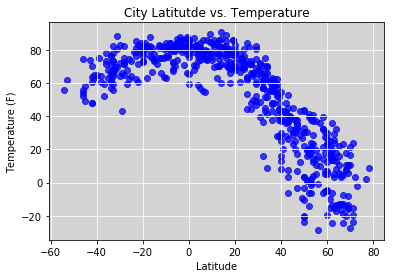

In [64]:
plt.scatter(df_pd["Lat"],df_pd["Temp"],color="blue",alpha = "0.75")
plt.title("City Latitutde vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True,color = "white")
plt.rcParams['axes.facecolor'] = 'lightgrey'
plt.show()

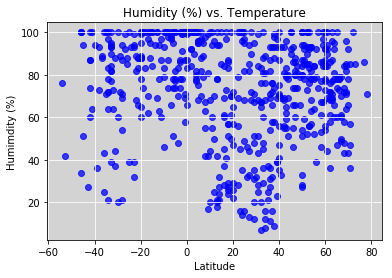

In [65]:
plt.scatter(df_pd["Lat"],df_pd["Humidity"],color="blue",alpha = "0.75")
plt.title("Humidity (%) vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Humimdity (%)")
plt.grid(True,color = "white")
plt.rcParams['axes.facecolor'] = 'lightgrey'
plt.show()

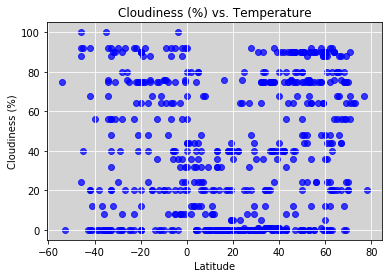

In [66]:
plt.scatter(df_pd["Lat"],df_pd["Cloudiness"],color="blue",alpha = "0.75")
plt.title("Cloudiness (%) vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True,color = "white")
plt.rcParams['axes.facecolor'] = 'lightgrey'
plt.show()

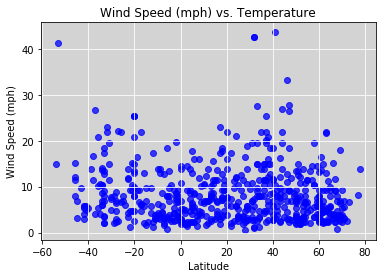

In [67]:
plt.scatter(df_pd["Lat"],df_pd["Wind Speed"],color="blue",alpha = "0.75")
plt.title("Wind Speed (mph) vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True,color = "white")
plt.rcParams['axes.facecolor'] = 'lightgrey'
plt.show()